In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Common AI models

# Classic machine learning models

## Assignment 1
From the Sklearn library choose models of at least the following types, train them on the 6 imported datasets, evaluate their accuracy or R^2 and see which model works best on which dataset. (Note that there are both regression and classification sets)
* Tree
* Neural Network
* Neighbors
* Ensemble
* Naive Byes (classification only)
* Linear

## Assignment 2
Use XGBoost running on GPU to predict the same datasets. You can activate GPU acceleration in the Runtime tab:
Runtime -> Change runtime type -> Select GPU from the dropdown

In [ ]:
from sklearn.datasets import load_iris, load_boston, load_diabetes, load_digits, load_wine, load_breast_cancer
from sklearn.metrics import accuracy_score, r2_score
from sklearn.model_selection import train_test_split

# Example of how to load 
X = load_iris().data
y = load_iris().target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
#from sklearn.tree import ExtraTreeClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
#from sklearn.svm.classes import OneClassSVM
from sklearn.neural_network.multilayer_perceptron import MLPClassifier, MLPRegressor
#from sklearn.neighbors.classification import RadiusNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
#from sklearn.multioutput import ClassifierChain
#from sklearn.multioutput import MultiOutputClassifier
#from sklearn.multiclass import OutputCodeClassifier
#from sklearn.multiclass import OneVsOneClassifier
#from sklearn.multiclass import OneVsRestClassifier
#from sklearn.linear_model.stochastic_gradient import SGDClassifier
#from sklearn.linear_model.ridge import RidgeClassifierCV
#from sklearn.linear_model.ridge import RidgeClassifier
#from sklearn.linear_model.passive_aggressive import PassiveAggressiveClassifier    
#from sklearn.gaussian_process.gpc import GaussianProcessClassifier
#from sklearn.ensemble.voting_classifier import VotingClassifier
#from sklearn.ensemble.weight_boosting import AdaBoostClassifier
#from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier
#from sklearn.ensemble.bagging import BaggingClassifier
#from sklearn.ensemble.forest import ExtraTreesClassifier
from sklearn.ensemble.forest import RandomForestClassifier, RandomForestRegressor
#from sklearn.naive_bayes import BernoulliNB
#from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import GaussianNB
#from sklearn.semi_supervised import LabelPropagation
#from sklearn.semi_supervised import LabelSpreading
#from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import LinearSVC, LinearSVR
from sklearn.linear_model import LogisticRegression, LinearRegression
#from sklearn.linear_model import LogisticRegressionCV
#from sklearn.naive_bayes import MultinomialNB  
#from sklearn.neighbors import NearestCentroid
#from sklearn.svm import NuSVC
from xgboost import XGBRegressor, XGBClassifier

classifiers = [DecisionTreeClassifier, MLPClassifier, KNeighborsClassifier, RandomForestClassifier, GaussianNB, LinearSVC, LogisticRegression, XGBClassifier]
regressors = [DecisionTreeRegressor, MLPRegressor, KNeighborsRegressor, RandomForestRegressor, LinearSVR, LinearRegression, XGBRegressor]

results = {}

data_loaders = [load_iris, load_boston, load_diabetes, load_digits, load_wine, load_breast_cancer]
for loader in data_loaders:
    loader_name = loader.__name__
    print(loader_name)
    results[loader_name] = {}
    X = loader().data
    y = loader().target

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    if 'Classification' in loader().DESCR:
        models = classifiers
    else:
        models = regressors

    for m in models:
        model_name = m.__name__
        drop = {}

        if "XGB" in model_name:
            m = m(tree_method='gpu_hist')
        else:
            m = m()
        fitted = m.fit(X=X_train, y=y_train)

        y_pred = fitted.predict(X_test)

        if 'Classification' in loader().DESCR:
            score = accuracy_score(y_test, y_pred)
        else: 
            score = r2_score(y_test, y_pred)

        results[loader_name][model_name]['score'] = score
        print(f'{model_name} accuracy: ', score)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neural_network.multilayer_perceptron module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neural_network. Anything that cannot be imported from sklearn.neural_network is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


load_iris
DecisionTreeClassifier accuracy:  0.98
MLPClassifier accuracy:  1.0
KNeighborsClassifier accuracy:  0.98


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


RandomForestClassifier accuracy:  0.98
GaussianNB accuracy:  0.96
LinearSVC accuracy:  0.98
LogisticRegression accuracy:  1.0


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


XGBClassifier accuracy:  0.98
load_boston
DecisionTreeRegressor accuracy:  0.7514129834828985


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPRegressor accuracy:  0.615450665222141
KNeighborsRegressor accuracy:  0.5748334691810936
RandomForestRegressor accuracy:  0.8627218878397265
LinearSVR accuracy:  0.30126863175216845
LinearRegression accuracy:  0.7261570836552481
[08:03:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


XGBRegressor accuracy:  0.8906424514798732
load_diabetes
DecisionTreeRegressor accuracy:  -0.15202062095000368


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPRegressor accuracy:  -3.086784987506947
KNeighborsRegressor accuracy:  0.43975256620686554
RandomForestRegressor accuracy:  0.47198314771902505
LinearSVR accuracy:  -0.42343950619158965
LinearRegression accuracy:  0.510395426135144
[08:03:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBRegressor accuracy:  0.4297231468315629
load_digits
DecisionTreeClassifier accuracy:  0.8333333333333334
MLPClassifier accuracy:  0.9747474747474747
KNeighborsClassifier accuracy:  0.9932659932659933
RandomForestClassifier accuracy:  0.9747474747474747
GaussianNB accuracy:  0.8164983164983165


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC accuracy:  0.9444444444444444


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression accuracy:  0.9629629629629629
XGBClassifier accuracy:  0.9646464646464646
load_wine
DecisionTreeClassifier accuracy:  0.9491525423728814


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier accuracy:  0.8813559322033898
KNeighborsClassifier accuracy:  0.6779661016949152
RandomForestClassifier accuracy:  1.0
GaussianNB accuracy:  1.0


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LinearSVC accuracy:  0.9152542372881356
LogisticRegression accuracy:  0.9830508474576272
XGBClassifier accuracy:  0.9830508474576272
load_breast_cancer
DecisionTreeRegressor accuracy:  0.6985321327248057


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPRegressor accuracy:  -3.7012407086130654
KNeighborsRegressor accuracy:  0.8497298630812877
RandomForestRegressor accuracy:  0.8405629209325274
LinearSVR accuracy:  0.31458587908767177
LinearRegression accuracy:  0.6911359869475926
[08:03:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


XGBRegressor accuracy:  0.8301625511124916


In [ ]:
for k, v in results.items():
    best_model = ''
    highest_score = -999
    for a, b, in v.items():
        if b['score'] > highest_score:
            best_model = a
            highest_score = b['score']
    print(f'Best model on {k} was {best_model} with score: {highest_score}')


Best model on load_iris was MLPClassifier with score: 1.0
Best model on load_boston was XGBRegressor with score: 0.8906424514798732
Best model on load_diabetes was LinearRegression with score: 0.510395426135144
Best model on load_digits was KNeighborsClassifier with score: 0.9932659932659933
Best model on load_wine was RandomForestClassifier with score: 1.0
Best model on load_breast_cancer was KNeighborsRegressor with score: 0.8497298630812877


In [ ]:
results

{'load_boston': {'DecisionTreeRegressor': {'score': 0.7514129834828985},
  'KNeighborsRegressor': {'score': 0.5748334691810936},
  'LinearRegression': {'score': 0.7261570836552481},
  'LinearSVR': {'score': 0.30126863175216845},
  'MLPRegressor': {'score': 0.615450665222141},
  'RandomForestRegressor': {'score': 0.8627218878397265},
  'XGBRegressor': {'score': 0.8906424514798732}},
 'load_breast_cancer': {'DecisionTreeRegressor': {'score': 0.6985321327248057},
  'KNeighborsRegressor': {'score': 0.8497298630812877},
  'LinearRegression': {'score': 0.6911359869475926},
  'LinearSVR': {'score': 0.31458587908767177},
  'MLPRegressor': {'score': -3.7012407086130654},
  'RandomForestRegressor': {'score': 0.8405629209325274},
  'XGBRegressor': {'score': 0.8301625511124916}},
 'load_diabetes': {'DecisionTreeRegressor': {'score': -0.15202062095000368},
  'KNeighborsRegressor': {'score': 0.43975256620686554},
  'LinearRegression': {'score': 0.510395426135144},
  'LinearSVR': {'score': -0.4234395

## Neural Nets

The moment you have all been waiting for, let's finally build our own neural network architecture! While you have already used Neural Nets in the previous assignment when using the Multi-Layer Perceptron (MLP), you did not really define an architecture. MLPs are generally a stack of fully connected a.k.a. Dense layers and that is what we will start with here as well. We will use one of the previous datasets and optimize the architecture below to improve the test accuracy.

In [ ]:
# Load dataset
from sklearn.datasets import load_iris

loader = load_iris()
X = loader.data
y = loader.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train.shape

(100, 4)

### Encode the target data
When doing a classification using NNs we generally one-hot encode the target variable. One-hot encoding meaning that we convert the target label into a binary vector where the length of the vector is the same size as the number of categories and we encode a class by keeping all scalars in the vector 0 except for the class that we want to encode which is 1. In other words, only one of the 10 values in the array can be 1 while all others are 0 and the location of the 1 represents the number in the class. so 4 becomes [0,0,0,1,0,0,0,0,0,0]

We sadly do not have time to go into detail on why this is and how you should go about this. SKlearn's LaberBinarizer below will do the trick for you. For those that are curious, you encode classes in an array because when you use a single number the neural network will assume that class 1 is closer to class 2 than to class 7. Think of it as classifying pictures of animals, the networks would think that class 1 (dog) is closer to class 2 (horse) than to class 8 (cat).



In [ ]:
# Convert labels to onehot encoding
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
lb.fit(y_train)
y_train = lb.transform(y_train)
y_test = lb.transform(y_test)
print(y_train[0])

[0 1 0]


### Designing the Neural Network
Designing an NN is a bit more complex than the algorithms used in challenge 1. As mentioned in the crash course an NN exists of multiple layers of which each can be of a different type.

We can build up the NN using Keras' sequential model.

The network blow uses standard Dense layers and ReLu activation functions. When you feel adventurous you can change these but for this exercise, we advise keeping those set. The first number in each layer defines the number of neurons in the layer and with that the limit of the amount of information that layer can pass to the next. The first layer is called the input layer, here you will need to define the shape of data it should be expecting. Based on this it can determine how many incoming connections each neuron will need. The Last Dense layer should compress the influx of data to the number of classes that exist, therefore the number of neurons should equal the number of classes. In the case of classification, the activation function should determine the choice your model is making. You can choose from several activation functions or even create your own, but when doing classification SoftMax is generally used.
 

In [ ]:
from tensorflow import keras

def define_model(input_shape, num_classes):
    # Build the architecture
    model = keras.Sequential(
        [
            keras.layers.Dense(32, activation="relu", input_shape=input_shape),
            keras.layers.Dense(16, activation="relu"),
            keras.layers.Dense(10, activation="relu"),
            keras.layers.Dense(num_classes, activation="softmax"),
        ]
    )

    print(model.summary())
    return model

### Training the network
When training a model we need to define the number of epochs it will run for. Furthermore, we need an optimizer, you can use a classic SDG optimizer but here we chose Adam which is similar but has an adaptive learning rate, so you don't need to choose one. Finally, we select a loss function that determines how well the NN is performing. For classification generally Categorical Crossentropy is used. 

In [ ]:
num_epochs = 150
input_shape = X_train.shape
num_classes = y_train.shape[-1]

model = define_model(input_shape, num_classes)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=num_epochs)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100, 32)           160       
_________________________________________________________________
dense_1 (Dense)              (None, 100, 16)           528       
_________________________________________________________________
dense_2 (Dense)              (None, 100, 10)           170       
_________________________________________________________________
dense_3 (Dense)              (None, 100, 3)            33        
Total params: 891
Trainable params: 891
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/150
4/4 [==============================] - 3s 5ms/step - loss: 1.0518 - accuracy: 0.4000
Epoch 2/150
4/4 [==============================] - 0s 4ms/step - loss: 1.0046 - accuracy: 0.3700
Epoch 3/150
4/4 [==============================] - 0s 6ms

### Metric Scores
Finally, we need to determine if our NN has actually learned something by testing it on data it has never seen before, the test set. Below we calculate the loss (categorical cross-entropy) which is a bit hard to interpret. But also the accuracy which can be used in case of classification and is very easy to interpret since it is basically the percentage of cases in the test set it predicted correctly.

In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.06666319072246552
Test accuracy: 0.9599999785423279


## **Challenge 2:** Tune the MLP
Tune the parameters until you get a test accuracy of 98%. We advise starting with changing the number of layers and the number of neurons in each layer and proceed with changing the number of epochs. You are free to change anything else from the optimizer to the layer types but make sure to save enough time for the next challenge. 

## Convolutional Neural Networks
This challenge is going to be a bit more, well... challenging. You are going to process image data and in the end-use Convolutional Neural Networks to process image data. These types of algorithms are designed to use multidimensional data where the spatial relations between the dimensions are relevant or in other words, good with pretty pictures.

Today we are going to use the MNIST dataset, probably the most famous dataset in all of AI. It consists of 28x28 pixel pictures of handwritten numbers in black and white images.

We are going to use some real Deep Learning here that benefits from GPU acceleration. Luckily Colab can provide us with a free GPU to train the neural networks faster. You can activate GPU acceleration in the Runtime tab: Runtime -> Change runtime type -> Select GPU from the dropdown



## Load the data

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Download the dataset
from keras.datasets import mnist, fashion_mnist
#(X_train, y_train), (X_test, y_test) = mnist.load_data()
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
print(X_train.shape)
print(X_test.shape)

4431872/4422102 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)


0


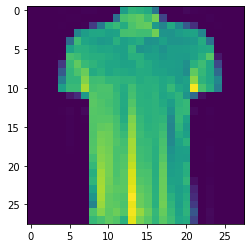

In [ ]:
# View example digit
index = np.random.randint(0,60000)
plt.imshow(X_train[index])
print(y_train[index])

### Reshaping the data
CNNs expect the data to be in a specific shape depending on the number of dimensions. Since we work with image data, we will use 2D CNN layers. The expected shape that would be as follows (number_of_samples, dimention_size_1, dimentionon_size_2, channel). Looking at the X_train. The shape above the first 3 is easy to derive. The number of training samples is 60000 and the images are 28*28 and therefore those would be the two dimension sizes. Channel would basically be the number of spectral wavelengths are in the data. For colored images this would be 3 (r,g,b) for black and white images this would just be 1, and for multispectral satellite images, this could be many more. In this case, we have black and white images, so we end up with the desired X_train shape of (60000,28,28,1). This is not the shape of our data as can be seen above, that would be (60000,28,28). This is because it has the intensity value in the second dimension instead of it being just a coordinate and an extra dimension for the intensity. Luckily we can easily reshape the data to our desired format.

In [ ]:
# Put it into suitable shape
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

In [ ]:
# Convert labels to onehot (just like in previous example)
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
lb.fit(y_train)
y_train = lb.transform(y_train)
y_test = lb.transform(y_test)
print(y_train[0])

[0 0 0 0 0 0 0 0 0 1]


### Architecture
Now for the architecture

- This time we defined the input in a separate Input Layer, which results in exactly the same as when you define input_shape in the first layer.
- Then we do a single Convolutional layer
- The last layer should stay a Dense layer with the number of classes for neurons just like with the previous. However, we can not just push 2D data into a 1D Dense layer therefore we need to Flatten the data first using a Flatten layer.


Configuring the Conv2D layers will require some fiddling, here is the documentation:
https://keras.io/api/layers/convolution_layers/convolution2d/
<br><br>
You should at least define a **filter size**, to keep it simple this number determines the amount of information that will be collected per output "pixel" in the output. So a higher number means more space for information but also longer compute times and larger model size. 
<br><br>
Then you should also define a **kernel size** (also known as window) Which basically determines how much information is condensed into an output "pixel". This means that larger kernels result in a larger segment of the image will be cramped into a smaller resulting image. So here larger means less information pushed to the next layer. 

**Warning:** When adding Conv layers and changing kernel sizes you impact the shape of de "image" that is passed to the next layers, often making it smaller. This means that when you stack too many layers and/or use large kernel sizes, the image at some point will become smaller than 0x0 resulting in a crash. You can simply calculate the effect each propagating layer will have on the image but you can also pay extra attention to the model summary since that will show the resulting image dimensions after each layer.
 


In [ ]:
from tensorflow import keras
from tensorflow.keras.layers import (Input, Conv2D, MaxPooling2D, Flatten, 
                                     Dense, Dropout, BatchNormalization, Activation)

In [ ]:
def define_cnn(input_shape, num_classes):
    # Build the architecture
    model = keras.Sequential()

    # first CONV => RELU => CONV => RELU => POOL layer set
    model.add(Conv2D(32, (3, 3), padding="same",
        input_shape=input_shape))
    model.add(Activation("relu"))
    model.add(BatchNormalization())
    model.add(Conv2D(32, (3, 3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    # second CONV => RELU => CONV => RELU => POOL layer set
    model.add(Conv2D(64, (3, 3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3, 3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    # first (and only) set of FC => RELU layers
    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation("relu"))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    # softmax classifier
    model.add(Dense(num_classes))
    model.add(Activation("softmax"))

    model.summary()
    return model



### Training the network
For the optimizer we will use classic Stochastic Gradient Descent. There exist more advanced optimizers like Adam, but we will skip those for now. The loss defines how we punish the network for a mistake. Without going into the details Categorical Crossentropy is generally used with classification.

In [ ]:
num_epochs = 10
batch_size = 32
input_shape = X_train.shape[1:]
num_classes = y_train.shape[-1]

model = define_cnn(input_shape, num_classes)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Train and test
H = model.fit(X_train, y_train, batch_size=batch_size, epochs=num_epochs, validation_data=(X_test, y_test))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
activation (Activation)      (None, 28, 28, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)       

In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.19323410093784332
Test accuracy: 0.9337000250816345


## **Challenge 2:** Tune the CNN
2.1: Add convolutional layers, change kernel and filter sizes to get to a 98% accuracy on the test dataset

2.2: Go back to the data loader and change the MNIST loader to the Fashion MNIST loader "fashion_mnist.load_data()". Tune the parameters until you reach an accuracy of 87% on the test dataset.

2.3 (Advanced): Include max-pooling, dropout, and batch normalization layers to reach a test accuracy of 90% on the test set.





## **Challenge 3 (Extra Advanced):** Forecasting and RNNs
Forecasting is a special branch of machine learning regression problems where you try to predict how the trend will proceed. Often this is still most successful with more classical statistical methods like variants on the Moving Average algorithm. These types of algorithms often require a better understanding of the dataset since its parameters really make or break the model. Note that for the following challenges no solutions are available and therefore no support will be provided.

3.1 Facebook has created an algorithm called Prophet which is based on statistical methods which makes it a bit easier to create such models and often outperforms other algorithms. Install and deploy Prophet on the dataset below.

3.2 Rolling SARIMAX is one of the most powerful statistical forecasting methods. While the algorithm itself is not too complex it can be hard to choose the correct parameters. Deploy a Rolling SARIMAX algorithm on the dataset below.

3.3 RNNs are very well suited for forecasting use cases, more specifically the LSTM and GRU types of RNNs often work well (not perse better than the above methods). RNNs will come up themselves with the parameters you had to define in previous algorithms, however that does not make them easier to deploy. Use an LSTM to forecast on the dataset below.


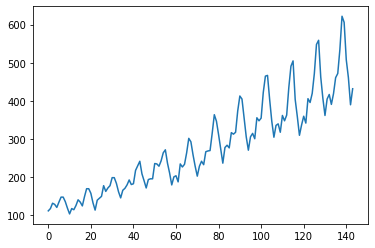

144


In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv', usecols=[1], engine='python')
plt.plot(df)
plt.show()
print(len(df))

In [ ]:
test_steps = 36
train, test = df[:test_steps], df[-test_steps:]